This is a simple example to show how the regularization works
and to get familiar with the sklearn library.


We will try to fit the polynomial model to it. We use linear regression
and rigid regression which is the linear regression with the quadratic penalty term added.
The penalty term strength is determined by the alpha parameter value (according to the lectures
notation it was called lambda). On the other hand the the complexity of the model can be changed
by changing the degree of the polynomial.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [6]:
#helper function
def sortXAndY(x,y):
  perm = x.argsort()
  return x[perm],y[perm] 

In [5]:
#For the purpose of this exercices we consider the simple noisy sine function.
def true_f(x):
    return np.sin(2*np.pi*x)

def sampleWithNoise(nSamples = 100, noiseFraction = 0.3, f = true_f):
    x = np.sort(np.random.rand(nSamples))
    return x, f(x) + noiseFraction* np.random.normal(0,1,len(x))

In [ ]:
# Number of samples.
samples = 100
# Fraction which determines how noisy is or sampled model.
frac =0.3
# Polynomial degree used to fit the model.
polynomialDegree = 1
# If true the penalty term in the cost function will be used
withRegularization = False
# The regularization parameter, which determines the strength of the penalty term.
alpha = 100
# In what ratio our sample will be divided into the training and test sets
# e.g. 0.8 means 80% of sampels for training and 20% for evaluation.
trainTestSplit = 0.8

if not withRegularization:
    alpha = 0

Training error:0.3248445415482858
Test error:0.2597064104569671


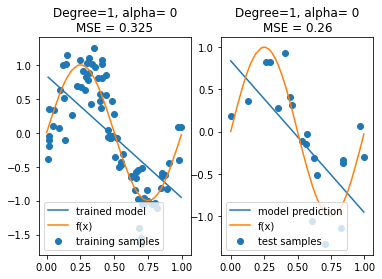

In [14]:
# Get our samples from the model. For the model details please check.
# model.py.
x, y = sampleWithNoise(nSamples = samples, noiseFraction = frac)

# We split our samples into training and tests sets, the samples are chosen randomly.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = trainTestSplit)

# We sort our divided sets to arrange them in ascending order with respect to x.
xTrain,yTrain  = sortXAndY(xTrain,yTrain)
xTest,yTest  = sortXAndY(xTest,yTest)

# To use linear regression with the polynomial fit, we add polynomial features from
# our original ones.x1=x --> x1=x, x2=x^2, etc.  e.g. [[2]] - > [[2], [4]]
# Please note that also mixed terms will be used. For more details see:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=polynomialDegree, include_bias =False)
# The reshape(-1,1) is a technical trick necessary only in case if we have only one feature per sample.
xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))

reg = None
if withRegularization:
# Ridge model is just linear regression + regularization term.
    reg = linear_model.Ridge (alpha = alpha)
else:
    reg = linear_model.LinearRegression()

# We train our model.
reg.fit(xTrainPolynomial,yTrain)
# We predict values from the training and test sets, based on our trained model.
yPredictTrain= reg.predict(xTrainPolynomial)
yPredictTest=reg.predict(xTestPolynomial)

# We calculate the train and test errors.
mseTrain = mean_squared_error(yTrain, yPredictTrain)
mseTest = mean_squared_error(yTest, yPredictTest)

print("Training error:" + str(mseTrain))
print("Test error:" + str(mseTest))

In [ ]:
#******Plotting part******
plt.figure(1)
plt.subplot(121)

plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTrain))
plt.scatter(xTrain, yTrain, label = "training samples")
plt.plot(xTrain, yPredictTrain, label='trained model')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")

plt.subplot(122)
plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTest))
plt.scatter(xTest, yTest, label = "test samples")
plt.plot(xTest, yPredictTest, label='model prediction')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")
plt.show()